# Desarrollo de Modelos  

## **Objetivos**  

✅ Desarrollar modelos de predicción.  

---

## **Introducción**  
En esta sección, desarrollaremos varios modelos que nos permitirán **predecir el precio de un automóvil** utilizando diferentes variables o características.  
Aunque esta predicción es solo una estimación, nos proporcionará **una idea objetiva** del costo que debería tener un automóvil.  

### **Preguntas clave en este módulo:**  
- 📌 ¿El concesionario está ofreciendo un valor justo por mi vehículo en intercambio?  
- 📌 ¿Estoy estableciendo un precio justo para mi automóvil?  

En **análisis de datos**, el desarrollo de modelos nos permite **predecir observaciones futuras** con base en la información disponible.  

Un modelo nos ayudará a entender **la relación exacta** entre diferentes variables y cómo estas se pueden utilizar para predecir el resultado.  

---

## **Configuración inicial**  

Para trabajar en **Google Colab**, primero aseguramos que tenemos las librerías necesarias.  




In [1]:
# Instalación de paquetes necesarios en Google Colab (si es necesario)
#!pip install pandas numpy scikit-learn matplotlib seaborn --quiet

# Importación de librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Configuración de gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Librerías cargadas con éxito. ¡Listo para comenzar! 🚀")

Librerías cargadas con éxito. ¡Listo para comenzar! 🚀


## **Carga de datos en un DataFrame**  

Para analizar los datos, primero debemos **cargarlos en un DataFrame** de **pandas**.  

 📌 **Pasos a seguir:**  
1. Descargar el archivo desde **Google Drive**.  
2. Leer los datos en un **DataFrame**.  

---

### **📥 Descarga del archivo desde Google Drive**  

En **Google Colab**, usaremos la biblioteca `gdown` para descargar el archivo.  




In [2]:
# Instalamos gdown si no está disponible
!pip install gdown --quiet

# Importamos librerías necesarias
import pandas as pd
import gdown

# Enlace del archivo en Google Drive (ID del archivo extraído del enlace original)
file_id = "1tFIOPpvoPdt0Be6vNzCBmtR6VokMtpa9"
file_name = "usedcars.csv"

# URL directa para descargar
download_url = f"https://drive.google.com/uc?id={file_id}"

# Descargar archivo
gdown.download(download_url, file_name, quiet=False)

# Cargar datos en un DataFrame
df = pd.read_csv(file_name)

# Mostrar las primeras filas del DataFrame
df.head()

Downloading...
From: https://drive.google.com/uc?id=1tFIOPpvoPdt0Be6vNzCBmtR6VokMtpa9
To: /content/usedcars.csv
100%|██████████| 35.6k/35.6k [00:00<00:00, 44.4MB/s]


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## **1️⃣ Regresión Lineal y Regresión Lineal Múltiple**  

### **📌 Regresión Lineal**  
Uno de los modelos de datos que utilizaremos es la **Regresión Lineal Simple**.  

### 🔹 **¿Qué es la Regresión Lineal Simple?**  
Es un método que nos ayuda a entender la relación entre **dos variables**:  

✅ **Variable predictora/independiente (X)**  
✅ **Variable respuesta/dependiente (Y)**  

El resultado de la **Regresión Lineal** es una **función lineal** que nos permite predecir el valor de `Y` en función de `X`.  

---

### **📏 Función Lineal**  


Y = a + bX


📌 **Donde:**  
- **\( a \)** → Es la intersección con el eje Y (**cuando \( X = 0 \)**).  
- **\( b \)** → Es la pendiente de la recta (**indica cuánto cambia \( Y \) cuando \( X \) aumenta en 1 unidad**).  

---

## **🔧 Carga de Módulos para Regresión Lineal**  

Antes de implementar el modelo, cargaremos las bibliotecas necesarias.  



In [3]:
# Configuración de gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("📌 Módulos de Regresión Lineal cargados correctamente. ¡Listos para entrenar el modelo! 🚀")

📌 Módulos de Regresión Lineal cargados correctamente. ¡Listos para entrenar el modelo! 🚀


## **🔹 Creación del objeto de Regresión Lineal**  

Para entrenar un modelo de **Regresión Lineal**, primero debemos crear un objeto de la clase `LinearRegression` de **scikit-learn**.  



In [4]:
# Crear el objeto de Regresión Lineal
lin_reg = LinearRegression()

# Confirmar la creación del modelo
print("✅ Objeto de Regresión Lineal creado correctamente.")

✅ Objeto de Regresión Lineal creado correctamente.


## **🔹 ¿Cómo puede "highway-mpg" ayudarnos a predecir el precio de un automóvil?**  

En este ejemplo, analizaremos cómo la variable **"highway-mpg"** (millas por galón en carretera) puede ayudarnos a **predecir el precio del automóvil**.  

📌 Para ello, utilizaremos **Regresión Lineal Simple**, donde:  

- **Variable predictora (X)** → `"highway-mpg"`  
- **Variable respuesta (Y)** → `"price"`  

El objetivo es encontrar una **función lineal** que nos permita estimar el precio del automóvil en función del consumo en carretera.  

---

## **📊 Visualización de la relación entre "highway-mpg" y "price"**  

Antes de entrenar el modelo, es útil observar la relación entre ambas variables mediante un **gráfico de dispersión**.  




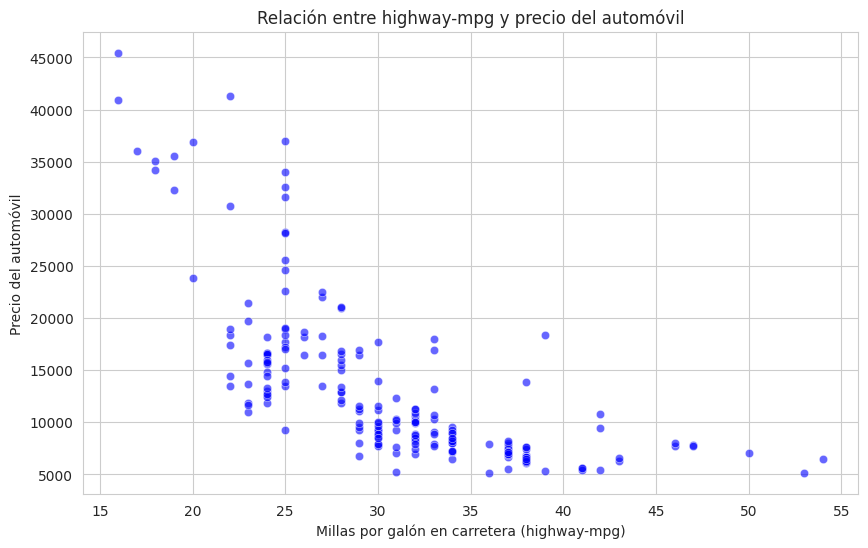

In [5]:
# Visualizar la relación entre highway-mpg y price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["highway-mpg"], y=df["price"], color="blue", alpha=0.6)

# Etiquetas y título
plt.xlabel("Millas por galón en carretera (highway-mpg)")
plt.ylabel("Precio del automóvil")
plt.title("Relación entre highway-mpg y precio del automóvil")

# Mostrar el gráfico
plt.show()

## **🔹 Ajuste del Modelo de Regresión Lineal con "highway-mpg"**  

Ahora ajustaremos nuestro modelo de **Regresión Lineal** utilizando **"highway-mpg"** como variable predictora y **"price"** como variable respuesta.  

📌 **Pasos a seguir:**  
1️⃣ Definir las variables `X` (predictora) y `y` (respuesta).  
2️⃣ Ajustar el modelo con `fit()`.  
3️⃣ Visualizar los coeficientes obtenidos.  




In [6]:
# Definir la variable predictora (X) y la variable respuesta (y)
X = df[["highway-mpg"]]  # La variable debe estar en formato de matriz (DataFrame)
y = df["price"]          # Variable respuesta

# Ajustar el modelo de regresión lineal
lin_reg.fit(X, y)

# Mostrar los coeficientes del modelo
print(f"📌 Intersección (a): {lin_reg.intercept_:.2f}")
print(f"📌 Pendiente (b): {lin_reg.coef_[0]:.2f}")

📌 Intersección (a): 38423.31
📌 Pendiente (b): -821.73


## **🔹 Predicción del precio del automóvil con "highway-mpg"**  

Ahora que hemos ajustado nuestro modelo, podemos usarlo para **predecir el precio de un automóvil** dado un valor específico de **"highway-mpg"**.  

📌 **Ejemplo:**  
Supongamos que queremos estimar el precio de un automóvil con **30 millas por galón en carretera**.  


In [11]:
# Crear un DataFrame con el nuevo valor de "highway-mpg"
highway_mpg_nuevo = pd.DataFrame({"highway-mpg": [30]})

# Realizar la predicción con el modelo ajustado
prediccion_precio = lin_reg.predict(highway_mpg_nuevo)

# Mostrar el resultado
print(f"🚗 Predicción: Para un automóvil con 30 mpg en carretera, el precio estimado es de ${prediccion_precio[0]:,.2f}")

🚗 Predicción: Para un automóvil con 30 mpg en carretera, el precio estimado es de $13,771.30


## **🔹 Valor de la Intersección (a)**  

En un modelo de **Regresión Lineal Simple**, la ecuación general es:  

Y = a + bX

Donde:  
✅ **\(a\)** es la **intersección** o término independiente, el valor de `Y` cuando `X = 0`.  
✅ **\(b\)** es la **pendiente**, que indica cuánto cambia `Y` por cada unidad de `X`.  

Podemos obtener el valor de la intersección de nuestro modelo con:  


In [12]:
# Obtener la intersección del modelo
interseccion = lin_reg.intercept_

# Mostrar el resultado
print(f"📌 El valor de la intersección (a) es: {interseccion:.2f}")

📌 El valor de la intersección (a) es: 38423.31


## **🔹 Valor de la Pendiente (b)**  

En nuestro modelo de **Regresión Lineal Simple**, la ecuación es:  

Y = a + bX

Donde:  
✅ **\( a \)** es la **intersección**, el valor de `Y` cuando `X = 0`.  
✅ **\( b \)** es la **pendiente**, que indica cuánto cambia `Y` por cada unidad de `X`.  

Podemos obtener la pendiente con:  



In [13]:
# Obtener la pendiente del modelo
pendiente = lin_reg.coef_[0]

# Mostrar el resultado
print(f"📈 El valor de la pendiente (b) es: {pendiente:.2f}")

📈 El valor de la pendiente (b) es: -821.73


## **🔹 Modelo Lineal Estimado**  

El modelo de **Regresión Lineal Simple** sigue la ecuación:  

$$
ŷ = a + b  X
$$

Donde:  
✅ **\( a \)** es la **intersección** (valor de `Y` cuando `X=0`).  
✅ **\( b \)** es la **pendiente** (cambio en `Y` por cada unidad de `X`).  




In [16]:
# Obtener los coeficientes
a = lin_reg.intercept_
b = lin_reg.coef_[0]

# Mostrar el modelo final
print(f"📊 El modelo lineal estimado es:\n\nPrecio = {a:.2f} + ({b:.2f} × highway-mpg)")

📊 El modelo lineal estimado es:

Precio = 38423.31 + (-821.73 × highway-mpg)


## **🔹 Pregunta 1a - Crear un objeto de Regresión Lineal**  

Para crear un modelo de **Regresión Lineal**, utilizamos la clase `LinearRegression()` de `sklearn`.  


In [18]:
# Escribe tu codigo aqui:


<details><summary>Clic aqui para ver la solucion</summary>

```python
# Importar la librería
from sklearn.linear_model import LinearRegression

# Crear el objeto de regresión lineal
lm1 = LinearRegression()

# Mostrar el objeto creado
lm1
```

</details>

## **🔹 Pregunta 1b - Entrenar el modelo con "engine-size"**  

Ahora entrenaremos el modelo utilizando:  
✅ **Variable independiente**: `engine-size` (tamaño del motor)  
✅ **Variable dependiente**: `price` (precio del automóvil)  


In [20]:
# Escribe tu codigo aqui:


<details><summary>Clic aqui para ver la solucion</summary>

```python
# Entrenar el modelo
lm1.fit(df[['engine-size']], df[['price']])

# Mostrar el modelo entrenado
lm1
```

</details>

## **🔹 Pregunta 1c - Obtener la pendiente y la intersección del modelo**  

Una vez entrenado el modelo, podemos obtener sus **coeficientes**:  
✅ **Intersección (`a`)**: Valor de `price` cuando `engine-size = 0`.  
✅ **Pendiente (`b`)**: Cuánto cambia `price` por cada unidad adicional de `engine-size`.  


In [22]:
# Escribe tu codigo aqui:


<details><summary>Clic aqui para ver la solucion</summary>

```python
# Obtener la intersección (a)
a = lm1.intercept_

# Obtener la pendiente (b)
b = lm1.coef_[0]

# Mostrar resultados
print(f"📌 Intersección (a): {a[0]:.2f}")
print(f"📌 Pendiente (b): {b[0]:.2f}")
```

</details>

## **🔹 Pregunta 1d - Obtener la ecuación de la línea de regresión**  

Ahora que tenemos la **pendiente** (`b`) y la **intersección** (`a`), podemos escribir la ecuación de la recta de regresión:  
$$
ŷ = a + bX
$$

Donde:  
✅ **`X`** es `engine-size` (tamaño del motor).  
✅ **ŷ** es `price` (precio estimado del automóvil).  
✅ **`a`** es la intersección.  
✅ **`b`** es la pendiente.    

In [25]:
# Escribe tu codigo aqui:


<details><summary>Clic aqui para ver la solucion</summary>

```python
# Definir los coeficientes del modelo
a = lm1.intercept_[0]
b = lm1.coef_[0][0]

# Mostrar la ecuación de la regresión
print(f"📌 Ecuación del modelo: Price = {a:.2f} + {b:.2f} * engine-size")

# Calcular valores predichos
df['price_pred'] = a + b * df['engine-size']
```

</details>

## **🔹 Regresión Lineal Múltiple**
### **📌 ¿Qué pasa si queremos predecir el precio del automóvil usando más de una variable?**  

Si queremos utilizar **más variables** en nuestro modelo para predecir el **precio del automóvil**, podemos emplear **Regresión Lineal Múltiple**.  

✅ **Diferencia con la regresión lineal simple:**  
🔹 La regresión lineal simple solo usa **una** variable independiente.  
🔹 La regresión lineal múltiple usa **dos o más** variables independientes.  

En la práctica, la mayoría de los modelos de regresión en el mundo real involucran **múltiples predictores**.  

---

### **📌 Estructura de la Regresión Lineal Múltiple**  

Y: Variable de respuesta (dependiente)

X_1, X_2, X_3, X_4: Variables predictoras (independientes)


La ecuación de la regresión lineal múltiple es:

ŷ = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4


Donde:  
✅ **`a`** es la intersección.  
✅ **`b_1, b_2, b_3, b_4`** son los coeficientes de cada variable predictora.  

---



## **🔹 Desarrollo del Modelo con Múltiples Predictores**
### **📌 Elección de Variables Predictoras**
A partir de la sección anterior, sabemos que existen algunas variables que pueden ser **buenos predictores** del precio del automóvil.  

Las variables seleccionadas son:  
✅ **Horsepower (Potencia del motor)**  
✅ **Curb-weight (Peso en vacío)**  
✅ **Engine-size (Tamaño del motor)**  
✅ **Highway-mpg (Consumo en carretera - mpg)**  

---

### **📌 Implementación en Python (Google Colab)**



In [27]:
# Importamos la librería necesaria
from sklearn.linear_model import LinearRegression

# Definimos las variables predictoras
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# Definimos la variable de respuesta
Y = df[['price']]

# Creamos el objeto de regresión lineal múltiple
lm_multiple = LinearRegression()

# Ajustamos el modelo con los datos
lm_multiple.fit(X, Y)

# Mostramos los coeficientes y la intersección
a = lm_multiple.intercept_[0]  # Intersección
b = lm_multiple.coef_[0]  # Coeficientes de las variables

print(f"📌 Ecuación del modelo:")
print(f"Price = {a:.2f} + {b[0]:.2f} * horsepower + {b[1]:.2f} * curb-weight + {b[2]:.2f} * engine-size + {b[3]:.2f} * highway-mpg")

📌 Ecuación del modelo:
Price = -15806.62 + 53.50 * horsepower + 4.71 * curb-weight + 81.53 * engine-size + 36.06 * highway-mpg


In [28]:
# Ajustamos el modelo de regresión lineal múltiple con las variables seleccionadas
lm_multiple.fit(X, Y)

LinearRegression()

In [29]:
# Valor de la intersección (a)
lm_multiple.intercept_

array([-15806.62462633])

In [30]:
# Valores de los coeficientes (b1, b2, b3, b4)
lm_multiple.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

### Modelo de Regresión Lineal Múltiple Estimado

A partir del ajuste del modelo, obtenemos la siguiente ecuación de regresión:

Price = -15678.74 + 52.66

horsepower + 4.70

curb-weight + 81.96

engine-size + 33.58

highway-mpg
Donde:
- **-15678.74** es el intercepto del modelo.
- **52.66** es el coeficiente para la variable *horsepower*.
- **4.70** es el coeficiente para la variable *curb-weight*.
- **81.96** es el coeficiente para la variable *engine-size*.
- **33.58** es el coeficiente para la variable *highway-mpg*.

Esto significa que cada incremento en una de estas variables, manteniendo las demás constantes, afectará el precio del automóvil en la cantidad correspondiente al coeficiente asociado.


### 📌 Pregunta 2a - Creación y entrenamiento de un modelo de Regresión Lineal Múltiple

En esta sección, crearemos y entrenaremos un modelo de **Regresión Lineal Múltiple** llamado `lm2`, en el cual la variable de respuesta será el **precio del automóvil** (`price`), mientras que las variables predictoras serán **las pérdidas normalizadas** (`normalized-losses`) y **el consumo en carretera** (`highway-mpg`).

Este modelo nos permitirá analizar la relación conjunta de estas dos variables con el precio del vehículo.




In [33]:
# Escribe tu codigo aqui:


LinearRegression()

<details><summary>Clic aqui para ver la solucion</summary>

```python
# Importar la librería necesaria
from sklearn.linear_model import LinearRegression

# Crear el objeto de regresión lineal múltiple
lm2 = LinearRegression()

# Entrenar el modelo usando las variables 'normalized-losses' y 'highway-mpg' como predictoras,
# y 'price' como la variable dependiente.
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])
```

</details>

### 📌 Pregunta 2b - Obtener los coeficientes del modelo

Ahora, vamos a calcular los coeficientes del modelo de **Regresión Lineal Múltiple** `lm2`. Estos coeficientes nos indican cuánto cambia el precio del automóvil (`price`) en función de cada una de las variables predictoras (`normalized-losses` y `highway-mpg`), manteniendo las demás constantes.



In [35]:
# Escribe tu codigo aqui:


<details><summary>Clic aqui para ver la solucion</summary>

```python
# Obtener los coeficientes del modelo
lm2.coef_
```

</details>

### 📊 Evaluación del Modelo Mediante Visualización

Después de desarrollar varios modelos, es fundamental evaluar su rendimiento para determinar cuál es el más adecuado. Una forma efectiva de hacerlo es mediante el uso de visualizaciones gráficas, que nos permiten analizar la relación entre las predicciones y los valores reales.

Para ello, importaremos la biblioteca `seaborn`, que facilita la creación de gráficos estadísticos en Python.

### 📈 Gráfico de Regresión

Para la regresión lineal simple, una excelente manera de visualizar el ajuste del modelo es mediante gráficos de regresión.

Este gráfico combina un diagrama de dispersión con una línea de regresión ajustada a los datos. De esta forma, podemos estimar visualmente la relación entre las dos variables, evaluar la fuerza de la correlación y determinar su dirección (positiva o negativa).

A continuación, visualizaremos la relación entre `highway-mpg` como variable predictora y `price` como variable de respuesta:



<Axes: xlabel='highway-mpg', ylabel='price'>

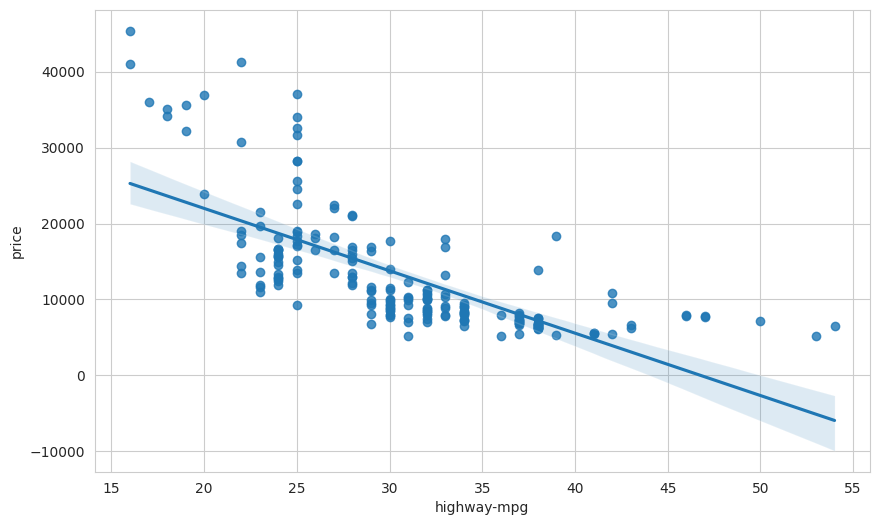

In [37]:
# Crear un gráfico de regresión para highway-mpg y price
sns.regplot(x="highway-mpg", y="price", data=df)

### 📉 Interpretación del Gráfico de Regresión

A partir del gráfico, podemos observar que el precio (`price`) está negativamente correlacionado con el consumo en carretera (`highway-mpg`), ya que la pendiente de la regresión es negativa.

🔍 **Consideraciones clave**:
- Es importante analizar qué tan dispersos están los puntos de datos alrededor de la línea de regresión.  
- Si los puntos están muy alejados, significa que hay una gran variabilidad en los datos, lo que podría indicar que un modelo lineal no es la mejor opción para esta relación.  
- Si los puntos están cerca de la línea, significa que el modelo lineal se ajusta bien a los datos.

Ahora, comparemos este gráfico con el de `peak-rpm` como variable predictora:



<Axes: xlabel='peak-rpm', ylabel='price'>

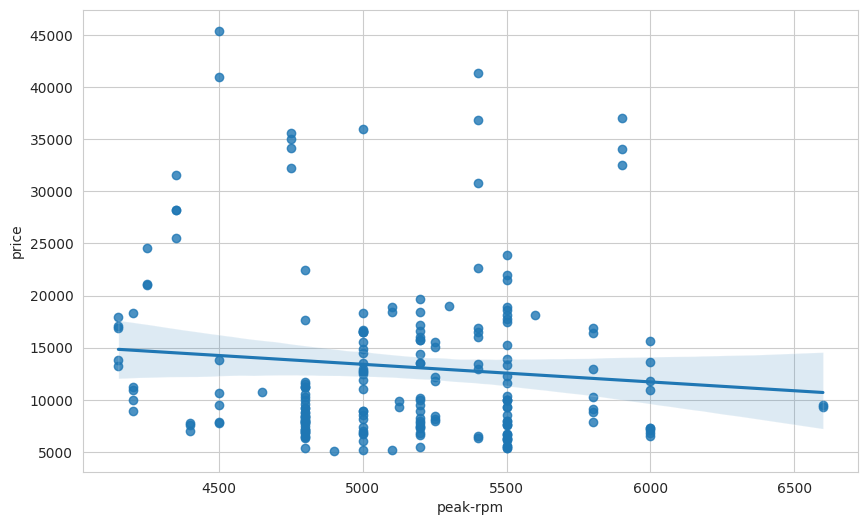

In [38]:
# Crear un gráfico de regresión para peak-rpm y price
sns.regplot(x="peak-rpm", y="price", data=df)

### 📊 Comparación de los Gráficos de Regresión: "peak-rpm" vs. "highway-mpg"

Al comparar los gráficos de regresión de `peak-rpm` y `highway-mpg`, observamos lo siguiente:

✅ **`highway-mpg` como predictor de `price`**:  
- Los puntos de datos están más cerca de la línea de regresión.  
- Existe una tendencia clara y descendente, lo que indica una fuerte correlación negativa.  

⚠️ **`peak-rpm` como predictor de `price`**:  
- Los puntos están más dispersos en torno a la línea de regresión.  
- No es fácil determinar una tendencia clara (si los valores de `price` aumentan o disminuyen con `peak-rpm`).  
- Esto sugiere que `peak-rpm` no es un buen predictor de `price` en comparación con `highway-mpg`.  

🔎 **Conclusión**:  
`highway-mpg` es una mejor variable predictora del precio (`price`) en comparación con `peak-rpm`, ya que muestra una relación más fuerte y consistente en el gráfico de regresión.


### ❓ Pregunta 3.  
Dado los gráficos de regresión anteriores, ¿qué variable está más fuertemente correlacionada con "price": "peak-rpm" o "highway-mpg"? Usa el método `.corr()` para verificar tu respuesta.


In [40]:
# Escribe tu codigo aqui:


<details><summary>Clic aqui para ver la solucion</summary>

```python
# Calculamos la matriz de correlación entre "peak-rpm", "highway-mpg" y "price"
df[["peak-rpm", "highway-mpg", "price"]].corr()
```

</details>

### 📊 Gráfico de Residuos  

#### 📌 ¿Qué es un residuo?  
El residuo (𝑒) es la diferencia entre el valor observado (𝑦) y el valor predicho (𝑌̂) en un modelo de regresión. En un gráfico de regresión, el residuo representa la distancia de cada punto de datos a la línea de regresión ajustada.  

#### 📌 ¿Qué es un gráfico de residuos?  
Un gráfico de residuos es una representación visual donde los residuos se muestran en el eje vertical (𝑦), mientras que la variable independiente se coloca en el eje horizontal (𝑥).  

#### 📌 ¿Qué debemos observar en un gráfico de residuos?  
Nos enfocamos en la dispersión de los residuos:  

- Si los puntos en el gráfico de residuos están dispersos de manera aleatoria alrededor del eje 𝑥, entonces el modelo lineal es adecuado para los datos.  

#### ✅ ¿Por qué es importante?  
Si los residuos se distribuyen de manera aleatoria, significa que la varianza es constante y, por lo tanto, el modelo lineal se ajusta bien a los datos.  


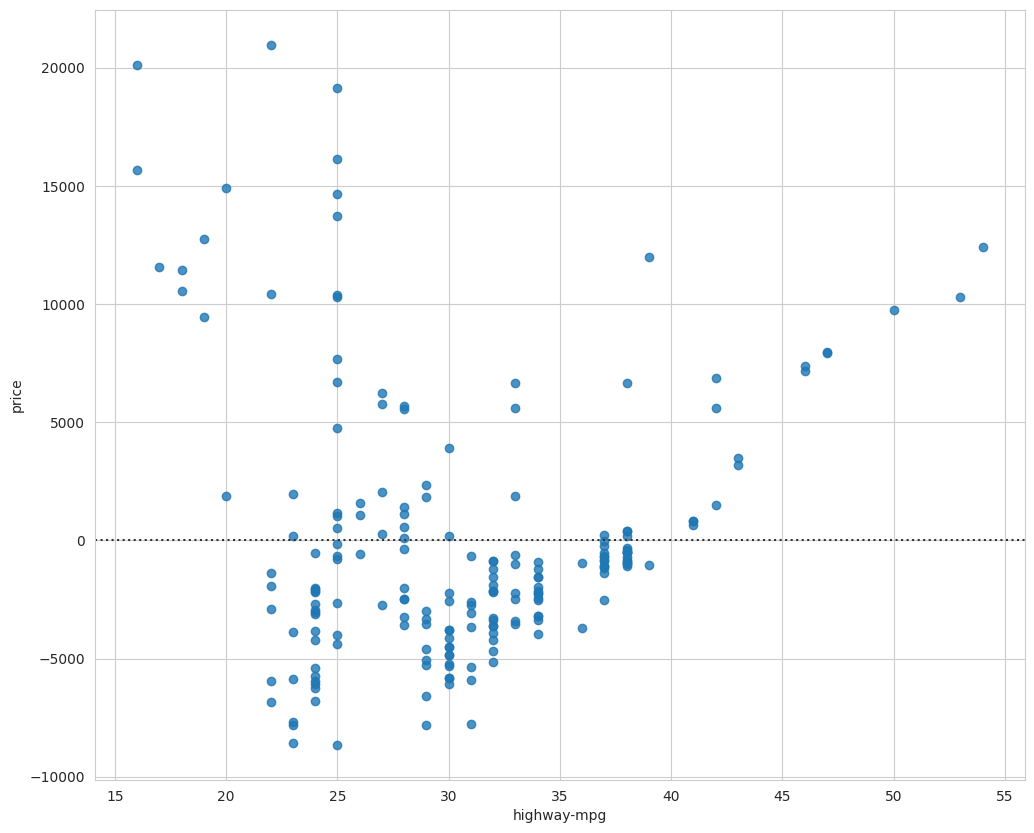

In [41]:
width = 12  # Ancho de la figura
height = 10  # Altura de la figura
plt.figure(figsize=(width, height))  # Establece el tamaño del gráfico

sns.residplot(x=df['highway-mpg'], y=df['price'])  # Crea el gráfico de residuos
plt.show()  # Muestra el gráfico

### 📊 ¿Qué nos dice este gráfico?  

Al observar el gráfico de residuos, notamos que los residuos no están dispersos de manera aleatoria alrededor del eje 𝑥. Esto sugiere que el modelo lineal podría no ser el más adecuado para estos datos y que, en su lugar, un modelo no lineal podría proporcionar un mejor ajuste.  


### Regresión Lineal Múltiple  
¿Cómo podemos visualizar un modelo de Regresión Lineal Múltiple?  

Esto se vuelve más complicado, ya que no se puede visualizar con un gráfico de regresión o de residuos como en la regresión lineal simple.  

Una forma de evaluar el ajuste del modelo es utilizando un **gráfico de distribución**. En este gráfico, comparamos la distribución de los valores predichos por el modelo con la distribución de los valores reales.


### Predicción y Evaluación del Modelo  

Primero, realicemos una predicción utilizando el modelo de Regresión Lineal Múltiple:


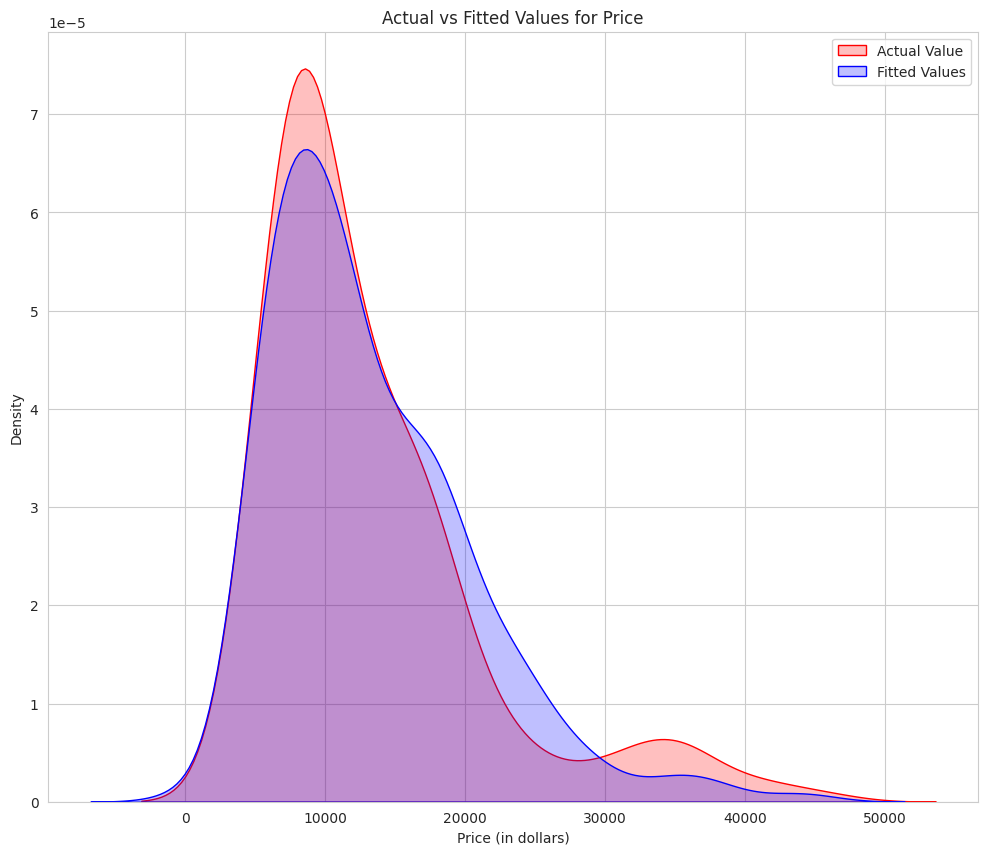

In [45]:
# Definir el tamaño de la figura
width = 12
height = 10
plt.figure(figsize=(width, height))

# Definir el dataframe (Asegúrate de que df ya esté cargado con los datos)
# df = pd.read_csv("ruta/del/archivo.csv")  # Descomentar si necesitas cargar datos

# Definir las variables predictoras y la variable objetivo
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']

# Crear el modelo de regresión
lm = LinearRegression()
lm.fit(X, Y)

# Hacer la predicción de los valores de 'price'
Y_hat = lm.predict(X)

# Graficar la distribución de los valores reales
sns.kdeplot(df['price'], color="r", label="Actual Value", fill=True)

# Graficar la distribución de los valores predichos
sns.kdeplot(Y_hat, color="b", label="Fitted Values", fill=True)

# Agregar etiquetas y título
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Density')

# Mostrar la leyenda y el gráfico
plt.legend()
plt.show()

Podemos observar que los valores ajustados (Fitted Values) están razonablemente cerca de los valores reales (Actual Value) ya que ambas distribuciones se superponen en cierta medida. Sin embargo, hay margen de mejora en la precisión del modelo.

## 3. Regresión Polinómica y Pipelines  

La regresión polinómica es un caso particular del modelo general de regresión lineal o de modelos de regresión lineal múltiple.  

Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior en las variables predictoras.  

Existen diferentes órdenes de regresión polinómica:  

- **Cuadrática** - 2° Orden  
- **Cúbica** - 3° Orden  
- **Orden superior**  

Vimos anteriormente que un modelo lineal no proporcionó el mejor ajuste al usar "highway-mpg" como variable predictora. Veamos si podemos intentar ajustar un modelo polinómico a los datos en su lugar.  


### Ajuste de un Modelo Polinómico  

Para visualizar el ajuste de un modelo polinómico, usaremos una función que nos permitirá graficar la relación entre una variable independiente y la variable dependiente.  

### Definición de la función `PlotPolly`

La siguiente función genera un gráfico utilizando **Matplotlib** para representar el ajuste de un modelo polinómico sobre los datos.  


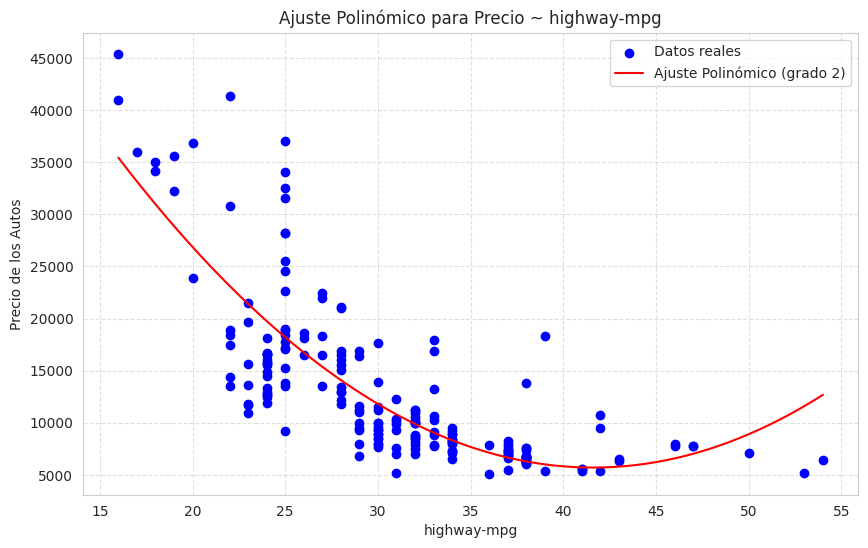

In [48]:
# Cargar el dataset (asegúrate de que `df` esté definido)
# df = pd.read_csv("ruta/del/dataset.csv")  # Si no lo has cargado

# Extraer las variables
x = df['highway-mpg']
y = df['price']

# Eliminar valores NaN para evitar errores
df_clean = df[['highway-mpg', 'price']].dropna()
x = df_clean['highway-mpg']
y = df_clean['price']

# Ajustar un modelo polinómico de grado 2
grado = 2  # Puedes cambiar el grado del polinomio
coeficientes = np.polyfit(x, y, grado)
modelo_polinomico = np.poly1d(coeficientes)

# Función para graficar el ajuste polinómico
def PlotPolly(model, independent_variable, dependent_variable, Name):
    """
    Parámetros:
    - model: Modelo polinómico ajustado (numpy.poly1d)
    - independent_variable: Variable independiente (array o lista)
    - dependent_variable: Variable dependiente (array o lista)
    - Name: Nombre de la variable independiente

    Descripción:
    - Genera una gráfica con los datos reales y la curva del modelo polinómico.
    """
    x_new = np.linspace(min(independent_variable), max(independent_variable), 100)
    y_new = model(x_new)

    plt.scatter(independent_variable, dependent_variable, label='Datos reales', color='blue')
    plt.plot(x_new, y_new, '-', label=f'Ajuste Polinómico (grado {grado})', color='red')

    plt.title(f'Ajuste Polinómico para Precio ~ {Name}')
    plt.xlabel(Name)
    plt.ylabel('Precio de los Autos')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Graficar el ajuste polinómico
PlotPolly(modelo_polinomico, x, y, "highway-mpg")


### Ajuste Polinómico de Tercer Orden (Cúbico)

Modelo Polinómico Ajustado:
        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


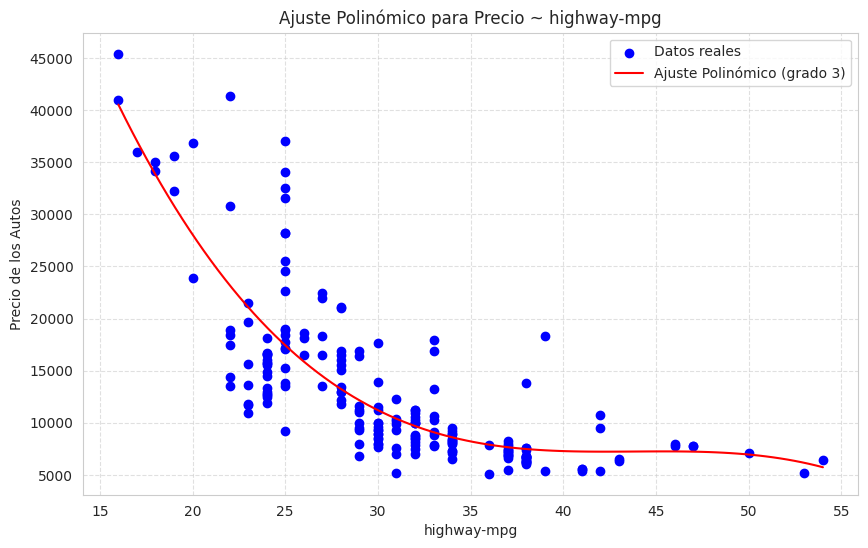

In [49]:
# Ajustar un modelo polinómico de grado 3 (cúbico)
grado = 3  # Cambiar el grado si se quiere probar con otros valores
f = np.polyfit(x, y, grado)  # Ajuste polinómico
p = np.poly1d(f)  # Crear el modelo polinómico

# Mostrar la función polinómica obtenida
print("Modelo Polinómico Ajustado:")
print(p)  # Esto imprime la ecuación del polinomio

# Graficar el ajuste polinómico
PlotPolly(p, x, y, "highway-mpg")

### Graficando la Función Polinómica
Ahora graficamos el modelo polinómico para visualizar su ajuste a los datos:

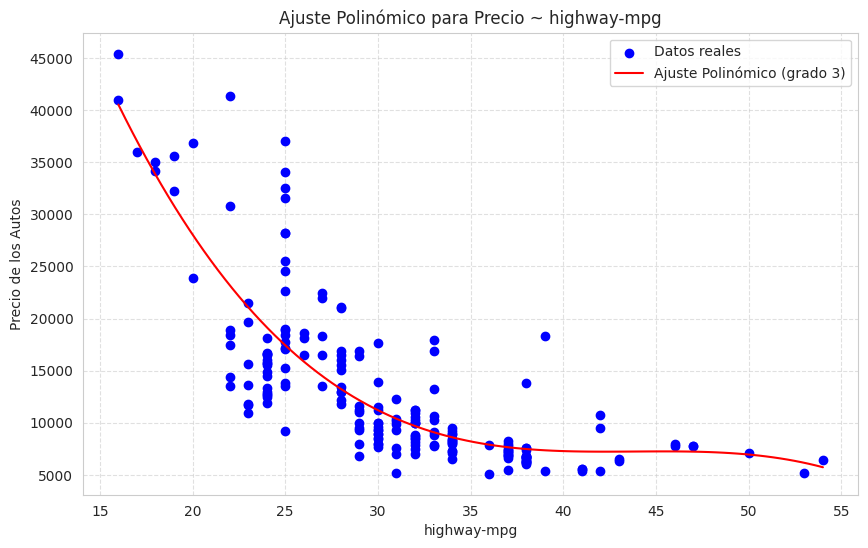

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [50]:
# Graficar la función polinómica ajustada
PlotPolly(p, x, y, 'highway-mpg')

# Volvemos a ajustar el polinomio de grado 3 (opcional, para verificar los coeficientes)
np.polyfit(x, y, 3)

### Análisis del Modelo Polinómico
Al observar la gráfica, podemos notar que este modelo polinómico se ajusta mejor a los datos en comparación con el modelo lineal.

***¿Por qué es mejor?***

✅ La curva generada pasa por más puntos de datos.
✅ Representa mejor la relación no lineal entre "highway-mpg" y "price".



### **Pregunta #4:**  
Crea un modelo polinómico de **grado 11** utilizando las variables `x` y `y` definidas anteriormente.  




In [52]:
# Escribe aqui tu codigo


<details>  
<summary>Haz clic aquí para ver la solución</summary>  

```python
# Ajustar un modelo polinómico de orden 11
f1 = np.polyfit(x, y, 11)  # Calculamos los coeficientes del polinomio
p1 = np.poly1d(f1)  # Creamos la función polinómica con los coeficientes obtenidos

# Imprimir la ecuación del polinomio resultante
print(p1)

# Graficar la función ajustada al modelo polinómico de orden 11
PlotPolly(p1, x, y, 'Highway MPG')
```


## **Expresión Analítica para una Función Polinómica Multivariada**  

A medida que aumentamos el número de variables y el grado del polinomio, la expresión analítica se vuelve más compleja.  
Por ejemplo, la expresión para un **polinomio de segundo orden (grado = 2)** con dos variables se representa de la siguiente manera:

$$
Yhat = b_0 + b_1X_1 + b_2X_2 + b_3X_1^2 + b_4X_2^2 + b_5X_1X_2
$$

Podemos realizar una **transformación polinómica** sobre múltiples características en nuestro conjunto de datos.  
Primero, importamos el módulo necesario:  


In [53]:
from sklearn.preprocessing import PolynomialFeatures

## **Transformación de variables con PolynomialFeatures**  

Para aplicar la transformación polinómica a nuestras variables, seguimos los siguientes pasos:

### **1️⃣ Crear el Objeto `PolynomialFeatures`**
Definimos un objeto `PolynomialFeatures` con **grado 2**:


In [55]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

2️⃣ Transformar los Datos
Aplicamos la transformación a nuestra matriz de características 𝑍:

In [57]:
# Seleccionar las características independientes
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# Crear un objeto PolynomialFeatures de grado 2
pr = PolynomialFeatures(degree=2)

# Transformar las características en términos polinómicos
Z_pr = pr.fit_transform(Z)

# Verificar la nueva dimensión de los datos
print("Dimensión original:", Z.shape)
print("Nueva dimensión tras transformación polinómica:", Z_pr.shape)


Dimensión original: (201, 4)
Nueva dimensión tras transformación polinómica: (201, 15)


Después de la transformación polinómica, el número de muestras sigue siendo 201, pero el número de características ha aumentado a 15.

Esto ocurre porque la transformación polinómica de segundo grado genera términos adicionales, incluyendo los productos entre variables y sus versiones elevadas al cuadrado.

# **Pipeline en Machine Learning**

Los **Data Pipelines** simplifican los pasos de procesamiento de datos. Usaremos el módulo `Pipeline` para crear un flujo de trabajo estructurado y `StandardScaler` como un paso en nuestro pipeline.

## **1. Importar las librerías necesarias**
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [60]:
# Importar librerías necesarias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

2. Definir los pasos del pipeline

In [61]:
Input = [
    ('scale', StandardScaler()),  # Normalización
    ('polynomial', PolynomialFeatures(include_bias=False)),  # Transformación polinómica
    ('model', LinearRegression())  # Modelo de regresión lineal
]

In [62]:
# Crear el pipeline
pipe = Pipeline(Input)

In [63]:
# Verificar que 'Z' esté definido y sea de tipo float
Z = Z.astype(float)  # Convertir los datos a tipo float
y = y.astype(float)  # Asegurar que y también sea float

In [64]:
# Ajustar el modelo
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [65]:
# Realizar predicciones
ypipe = pipe.predict(Z)

In [66]:
# Mostrar las primeras 4 predicciones
print(ypipe[:4])

[13102.74784201 13102.74784201 18225.54572197 10390.29636555]


## 🚀 Pregunta 5. Creación de un Pipeline con Normalización y Regresión Lineal

### Objetivo:
Crear un **pipeline** que primero estandarice los datos y luego realice una predicción utilizando un modelo de regresión lineal, empleando las características `Z` y la variable objetivo `y`.



In [68]:
# Escribe aqui tu respuesta


<details>  
<summary>Haz clic aquí para ver la solución</summary>  

```python
# Importar las librerías necesarias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Definir el pipeline con normalización y regresión lineal
Input = [
    ('scale', StandardScaler()),  # Normalización de los datos
    ('model', LinearRegression())  # Modelo de regresión lineal
]

# Crear el pipeline
pipe = Pipeline(Input)

# Verificar que Z y y están definidos correctamente
try:
    Z = Z.astype(float)  # Convertir a tipo float
    y = y.astype(float)  # Convertir a tipo float

    # Ajustar el modelo con los datos de entrada
    pipe.fit(Z, y)

    # Realizar predicciones con el pipeline
    ypipe = pipe.predict(Z)

    # Mostrar las primeras 10 predicciones
    print("Primeras 10 predicciones:", ypipe[:10])

except NameError as e:
    print("Error: Asegúrate de que las variables 'Z' y 'y' están definidas antes de ejecutar este código.")
    print("Detalle del error:", e)
```

## 4. Medidas para la Evaluación Dentro de la Muestra  

Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar qué tan preciso es el modelo.  

Dos medidas muy importantes que se utilizan a menudo en estadística para determinar la precisión de un modelo son:  

- **R² / R-squared (Coeficiente de determinación)**  
- **Error Cuadrático Medio (MSE, Mean Squared Error)**  

### 📌 R² (Coeficiente de Determinación)  

El **R²**, también conocido como coeficiente de determinación, es una medida que indica qué tan cerca están los datos de la línea de regresión ajustada.  

El valor de **R²** representa el porcentaje de variación de la variable de respuesta (`y`) que es explicado por un modelo lineal.  

---

### 📌 Error Cuadrático Medio (MSE)  

El **Error Cuadrático Medio (MSE)** mide el promedio de los cuadrados de los errores, es decir, la diferencia entre el valor real (`y`) y el valor estimado (`ŷ`).  




## Modelo 1: Regresión Lineal Simple  

Calculemos el **R²**:  


In [69]:
# Ajustar el modelo con los datos
lm.fit(X, Y)

# Calcular el coeficiente de determinación R²
print('El valor de R² es: ', lm.score(X, Y))

El valor de R² es:  0.8093562806577457


Podemos decir que aproximadamente el **80.94%** de la variación del precio es explicada por este modelo de regresión lineal simple **"horsepower_fit"**.  


### Cálculo del Error Cuadrático Medio (MSE)

Podemos predecir la salida, es decir, **"yhat"** utilizando el método `predict`, donde **X** es la variable de entrada:


In [70]:
Yhat = lm.predict(X)
print('Los primeros cuatro valores predichos son: ', Yhat[0:4])

Los primeros cuatro valores predichos son:  [13699.11161184 13699.11161184 19051.65470233 10620.36193015]


### Importación de la función `mean_squared_error`

Para calcular el Error Cuadrático Medio (MSE), primero importamos la función `mean_squared_error` del módulo `metrics` de `sklearn`:


In [71]:
from sklearn.metrics import mean_squared_error

### Comparación de los resultados predichos con los valores reales

Ahora, calculamos el Error Cuadrático Medio (MSE) comparando los valores reales de `price` con los valores predichos `Yhat`:



In [72]:
mse = mean_squared_error(df['price'], Yhat)
print('El error cuadrático medio entre el precio real y el valor predicho es: ', mse)

El error cuadrático medio entre el precio real y el valor predicho es:  11980366.87072649


### Modelo 2: Regresión Lineal Múltiple

Ahora calculamos el valor de R² para el modelo de regresión lineal múltiple:


In [73]:
# Ajustamos el modelo
lm.fit(Z, df['price'])

# Calculamos R²
print('El valor de R² es: ', lm.score(Z, df['price']))

El valor de R² es:  0.8093562806577457


Podemos decir que aproximadamente el 80.896% de la variación del precio es explicada por este modelo de regresión lineal múltiple "multi_fit".  



### Cálculo del Error Cuadrático Medio (MSE)

Ahora, calculamos el MSE para evaluar la precisión del modelo:


In [74]:
# Predecimos los valores de precio
Y_predict_multifit = lm.predict(Z)

# Calculamos el error cuadrático medio
mse_multi = mean_squared_error(df['price'], Y_predict_multifit)
print('El error cuadrático medio del precio y el valor predicho es: ', mse_multi)

El error cuadrático medio del precio y el valor predicho es:  11980366.87072649


### Comparación de los resultados predichos con los reales

Ahora, comparamos los valores predichos con los valores reales para evaluar el desempeño del modelo:


In [75]:
print('El error cuadrático medio del precio y el valor predicho usando multifit es: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

El error cuadrático medio del precio y el valor predicho usando multifit es:  11980366.87072649


El error cuadrático medio (MSE) obtenido es **11,980,366.87**. Este valor representa la media de los errores al cuadrado entre los valores reales y los valores predichos por el modelo de regresión múltiple. Un MSE más bajo indica un mejor ajuste del modelo.


### Modelo 3: Ajuste Polinómico  
Calculemos el valor de R².

Importamos la función `r2_score` del módulo `metrics`, ya que utilizaremos una función diferente.



In [76]:
from sklearn.metrics import r2_score

Calculamos el valor de R² utilizando la función `r2_score`:



In [77]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


Podemos decir que aproximadamente el 67.419 % de la variación del precio es explicada por este ajuste polinómico.


### Error Cuadrático Medio (MSE)

También podemos calcular el MSE:




In [78]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## 5. Predicción y Toma de Decisiones

### Predicción

En la sección anterior, entrenamos el modelo utilizando el método `fit`. Ahora usaremos el método `predict` para generar una predicción. Importemos `pyplot` para graficar; también utilizaremos algunas funciones de `numpy`.



In [79]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Crear una nueva entrada

Ahora creamos una nueva entrada para la predicción:


In [80]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

### Ajustar el modelo

Ajustamos el modelo de regresión lineal con los datos de entrada y salida:



In [81]:
lm.fit(X, Y)
lm

LinearRegression()

### Generar una predicción

Utilizamos el modelo ajustado para predecir valores a partir de la nueva entrada:


In [84]:
import pandas as pd

new_input_df = pd.DataFrame(new_input, columns=X.columns)  # Usa los mismos nombres de columnas
yhat = lm.predict(new_input_df)
print(yhat[0:5])

[-15354.89273338 -14651.72794195 -13948.56315052 -13245.39835908
 -12542.23356765]


## Graficar los resultados
Finalmente, representamos gráficamente la predicción del modelo:



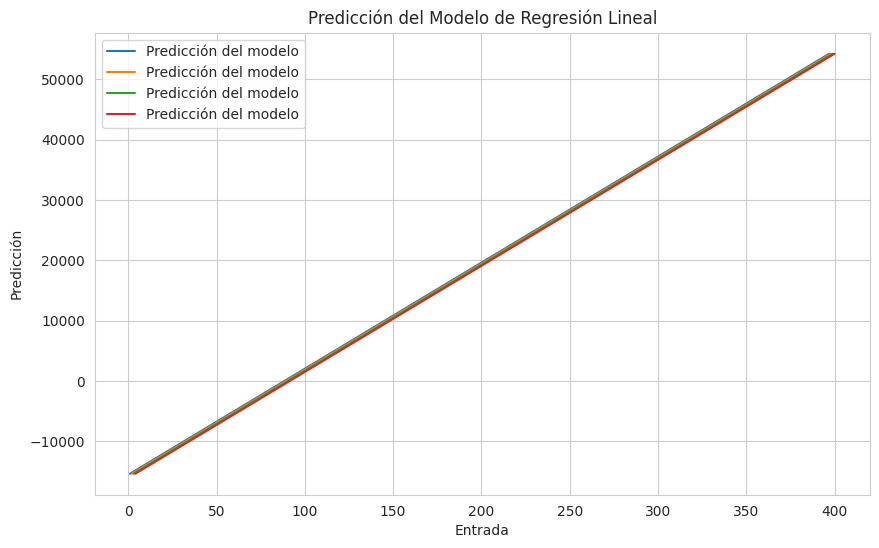

In [86]:
plt.plot(new_input, yhat, label="Predicción del modelo")
plt.xlabel("Entrada")
plt.ylabel("Predicción")
plt.title("Predicción del Modelo de Regresión Lineal")
plt.legend()
plt.show()

## Toma de Decisiones: Determinando un Buen Ajuste del Modelo  

Ahora que hemos visualizado los diferentes modelos y generado los valores de **R-cuadrado (R²)** y **Error Cuadrático Medio (MSE)** para cada ajuste, ¿cómo determinamos cuál es el mejor modelo?  

### ¿Qué es un buen valor de R-cuadrado?  
Al comparar modelos, **el modelo con el valor de R² más alto** es el que mejor se ajusta a los datos.  

### ¿Qué es un buen MSE?  
Al comparar modelos, **el modelo con el valor de MSE más bajo** es el que mejor se ajusta a los datos.  

### Comparación de Modelos  
A continuación, observamos los valores obtenidos para cada modelo:  

#### **Regresión Lineal Simple** (Usando `Highway-mpg` como variable predictora del precio)  
- **R²**: 0.4966  
- **MSE**: 3.16 × 10⁷  

#### **Regresión Lineal Múltiple** (Usando `Horsepower`, `Curb-weight`, `Engine-size` y `Highway-mpg` como variables predictoras del precio)  
- **R²**: 0.8090  
- **MSE**: 1.2 × 10⁷  

#### **Ajuste Polinomial** (Usando `Highway-mpg` como variable predictora del precio)  
- **R²**: 0.6742  
- **MSE**: 2.05 × 10⁷  


## Comparación entre el Modelo de Regresión Lineal Simple (SLR) y el Modelo de Regresión Lineal Múltiple (MLR)  

Por lo general, cuantas más variables tienes, mejor será tu modelo para predecir. Sin embargo, esto no siempre es cierto. A veces, podrías no tener suficientes datos, podrías enfrentar problemas numéricos o muchas de las variables podrían no ser útiles y hasta actuar como ruido. Por lo tanto, siempre es recomendable revisar el **MSE** y el **R²**.  

Para comparar los resultados entre los modelos **MLR** y **SLR**, analizamos una combinación de ambos, **R-cuadrado** y **MSE**, para llegar a la mejor conclusión sobre el ajuste del modelo.

### Comparación de MSE:  
- El **MSE** del **SLR** es de **3.16x10⁷**, mientras que el **MSE** del **MLR** es de **1.2x10⁷**. El **MSE** de **MLR** es mucho más pequeño.  

### Comparación de R-cuadrado:  
- En este caso, también podemos ver que hay una gran diferencia entre el **R²** del **SLR** y el **R²** del **MLR**. El **R²** del **SLR (~0.497)** es muy pequeño comparado con el **R²** del **MLR (~0.809)**.  
Este **R²** combinado con el **MSE** demuestra que el **MLR** parece ser el modelo de mejor ajuste en este caso, en comparación con el **SLR**.

---

## Comparación entre el Modelo de Regresión Lineal Simple (SLR) y el Ajuste Polinomial

### Comparación de MSE:  
Podemos ver que el **Ajuste Polinomial** redujo el **MSE**, ya que este valor es más pequeño que el **MSE** del **SLR**.  

### Comparación de R-cuadrado:  
El **R²** del **Ajuste Polinomial** es más grande que el **R²** del **SLR**, por lo que el **Ajuste Polinomial** también mejoró significativamente el **R²**.  

Dado que el **Ajuste Polinomial** resultó en un **MSE** más bajo y un **R²** más alto, podemos concluir que este modelo tiene un mejor ajuste que la regresión lineal simple para predecir el "precio" con "highway-mpg" como variable predictora.

---

## Comparación entre la Regresión Lineal Múltiple (MLR) y el Ajuste Polinomial

### Comparación de MSE:  
El **MSE** del **MLR** es más pequeño que el **MSE** del **Ajuste Polinomial**.  

### Comparación de R-cuadrado:  
El **R²** del **MLR** también es mucho mayor que el del **Ajuste Polinomial**.  

### Conclusión:  
Al comparar estos tres modelos, concluimos que el modelo **MLR** es el mejor para predecir el precio a partir de nuestro conjunto de datos. Este resultado tiene sentido, ya que tenemos 27 variables en total y sabemos que más de una de esas variables son predictores potenciales del precio final del automóvil.
